In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
a=pd.read_csv("/content/50_Startups.csv")
a

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
a=a.drop('State', axis = 1)
a

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [4]:
a.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [5]:
a.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


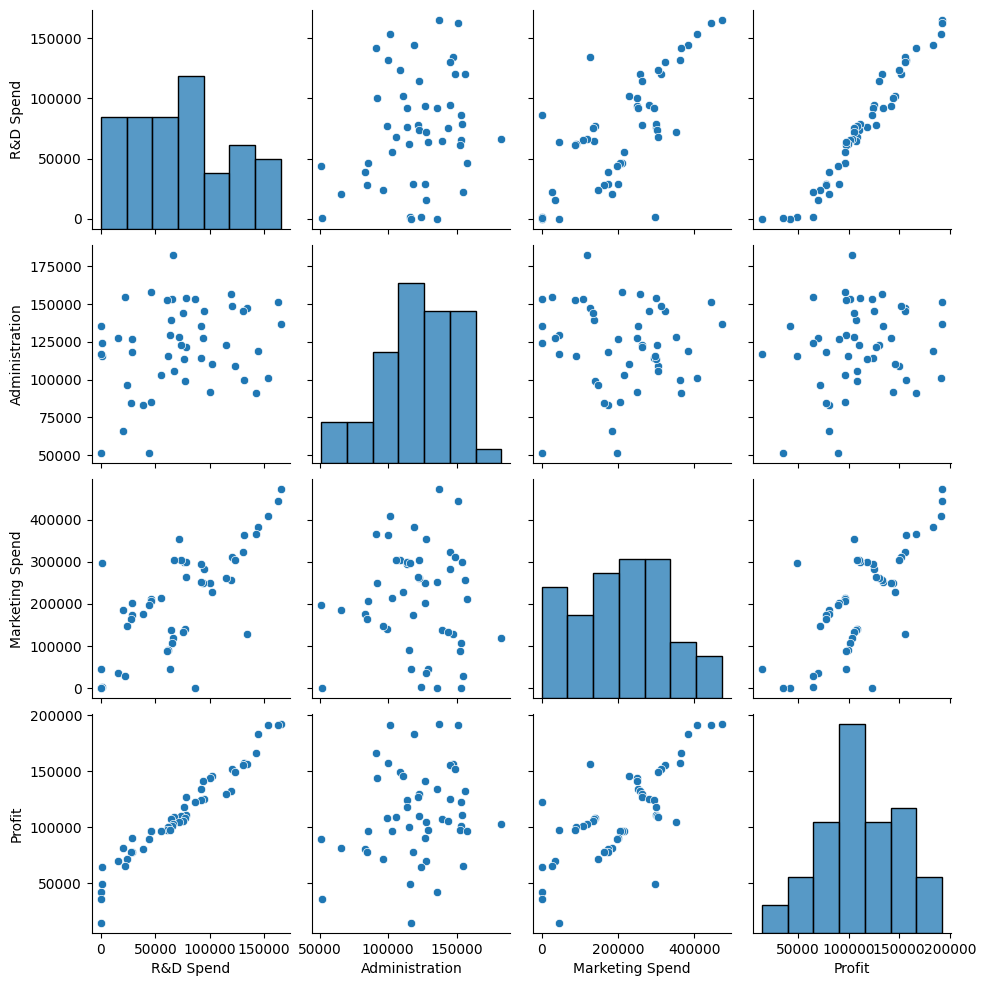

In [6]:
sns.pairplot(a)

In [7]:
a.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

In [8]:
a=a.rename({'R&D Spend':'RandD_Spend','Marketing Spend':'Marketing_Spend'},axis=1)
#%%
mod = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = a).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        07:54:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

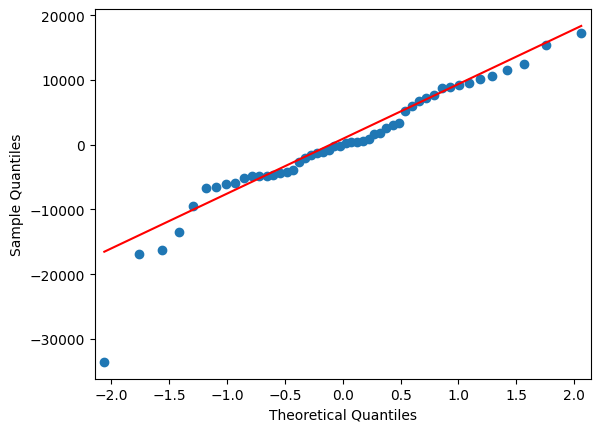

In [9]:
import statsmodels.api as sm
qqplot=sm.qqplot(mod.resid,line='q')

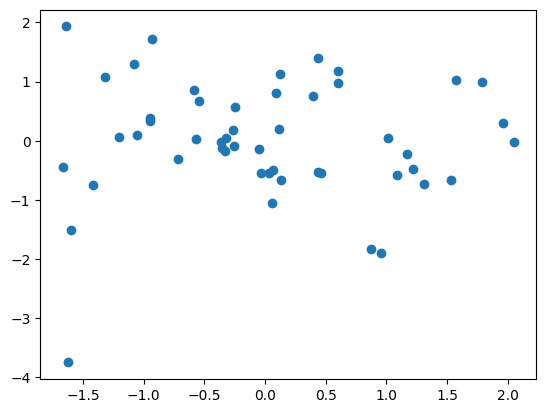

In [10]:
def std( vals ):                      #Loop created for return values.
    return (vals - vals.mean())/vals.std()

plt.scatter(std(mod.fittedvalues),
            std(mod.resid))

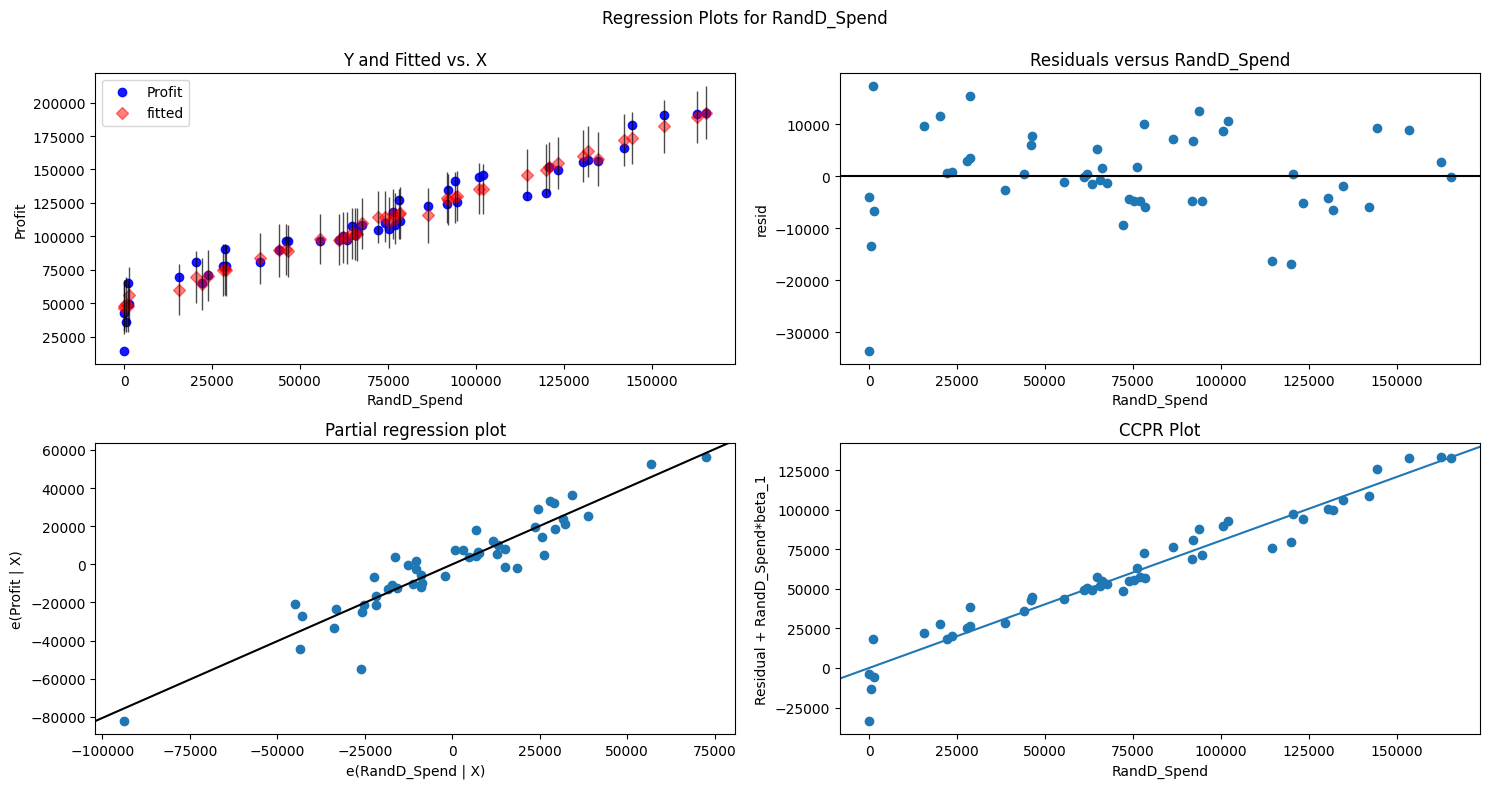

In [11]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mod, "RandD_Spend", fig=fig)
plt.show()

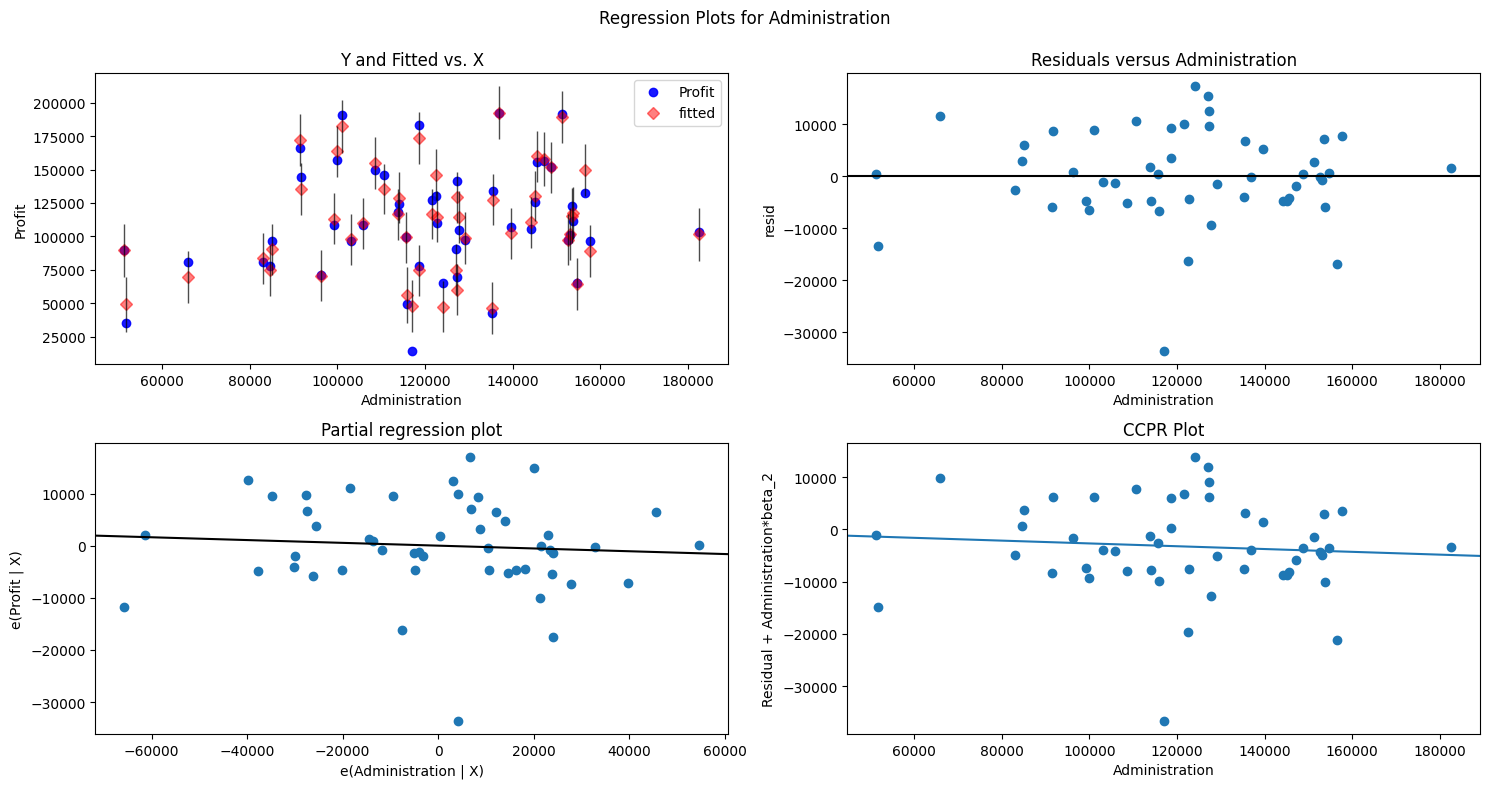

In [12]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mod, "Administration", fig=fig)
plt.show()

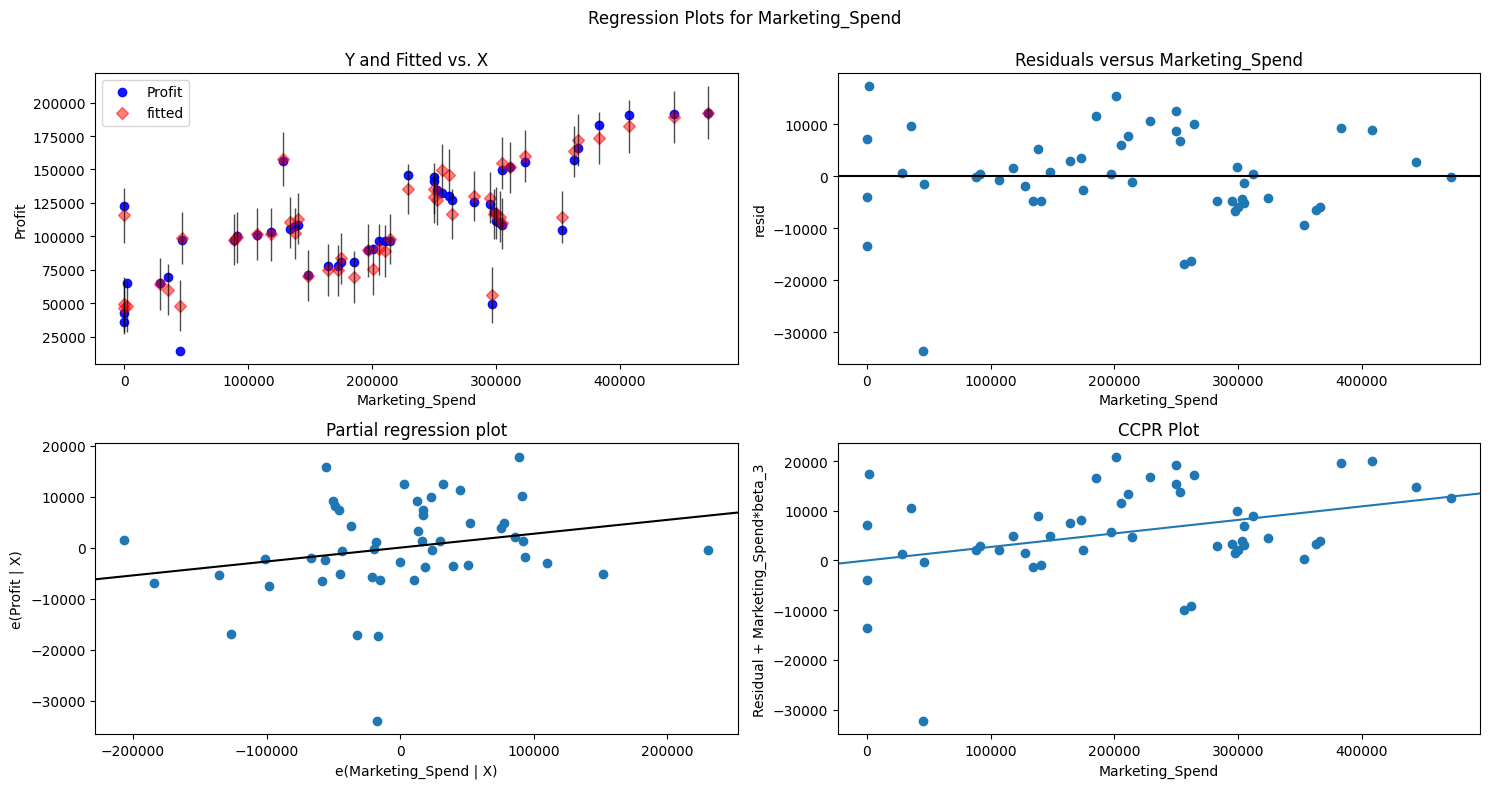

In [13]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(mod, "Marketing_Spend", fig=fig)
plt.show()

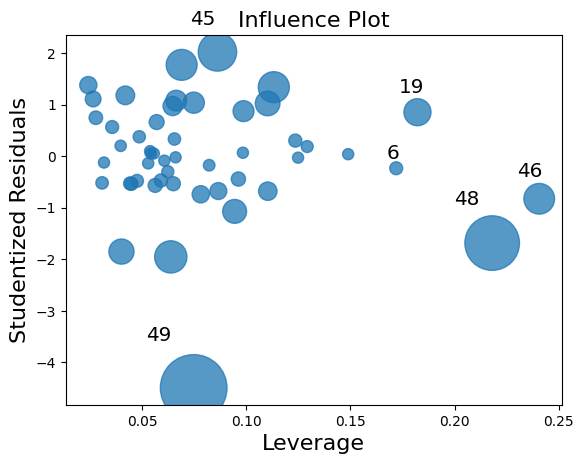

In [14]:
mod_influence = mod.get_influence()
(c, _) = mod_influence.cooks_distance

influence_plot(mod)
plt.show()

In [15]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

In [16]:
mod = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = a).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           4.53e-30
Time:                        07:58:47   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD_Spend         0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
a[a.index.isin([49])]

,RandD_Spend,Administration,Marketing_Spend,Profit
49,0.0,116983.8,45173.06,14681.4


In [18]:
a1=a.drop(49,axis=0)

In [19]:
mod1 = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = a1).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           8.85e-32
Time:                        07:59:49   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RandD_Spend         0.7830      0.038     20.470      0.000       0.706       0.860
Administration     -0.0222      0.043     -0.518      0.607      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

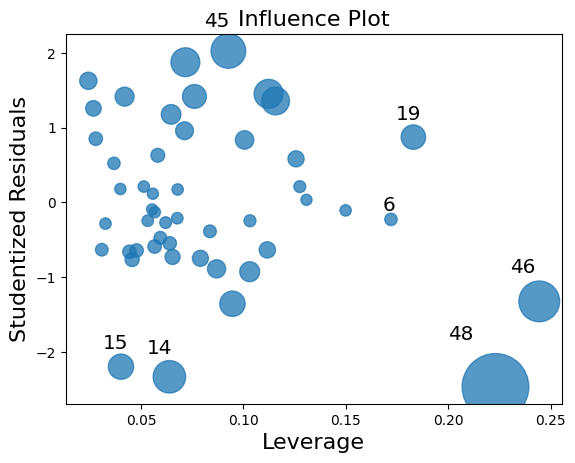

In [20]:
mod_influence = mod1.get_influence()
(c, _) = mod_influence.cooks_distance

influence_plot(mod1)
plt.show()

In [21]:
a[a.index.isin([48])]

,RandD_Spend,Administration,Marketing_Spend,Profit
48,542.05,51743.15,0.0,35673.41


In [22]:
a2=a.drop(48,axis=0)

In [23]:
mod2 = smf.ols("Profit~RandD_Spend+Administration+Marketing_Spend",data = a2).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     284.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.92e-29
Time:                        08:01:14   Log-Likelihood:                -513.87
No. Observations:                  49   AIC:                             1036.
Df Residuals:                      45   BIC:                             1043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.568e+04   7237.676      7.693      0.000    4.11e+04    7.03e+04
RandD_Spend         0.8120      0.044     18.278      0.000       0.722       0.901
Administration     -0.0615      0.054     -1.137      0.262      -0.170       0.047
Marketing_Spend     0.0203      0.017      1.220      0.229      -0.013       0.054
==============================================================================
Omnibus:                       19.614   Durbin-Watson:                   1.487
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.399
Skew:                          -1.137   Prob(JB):                     1.25e-08
Kurtosis:                       6.558   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**2nd model is best**